In [6]:
import pandas as pd

In [7]:
data = pd.read_csv('iris.csv')
data.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
139,140,6.9,3.1,5.4,2.1,Iris-virginica
20,21,5.4,3.4,1.7,0.2,Iris-setosa
76,77,6.8,2.8,4.8,1.4,Iris-versicolor
77,78,6.7,3.0,5.0,1.7,Iris-versicolor
94,95,5.6,2.7,4.2,1.3,Iris-versicolor


In [8]:
data = data.drop('Id', axis=1)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
data['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

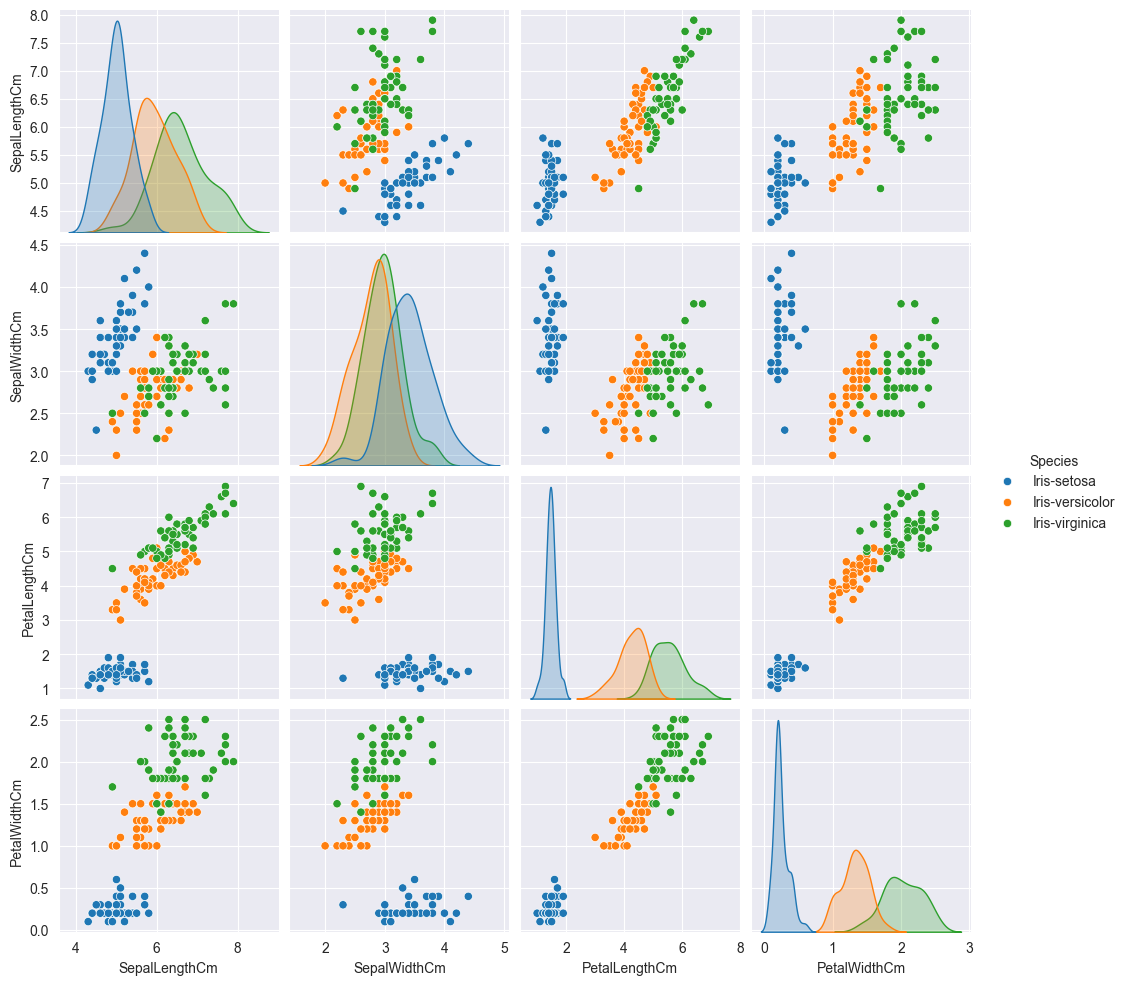

In [11]:
import seaborn as sns
sns.pairplot(data, hue='Species')

In [12]:
x = data.iloc[:, 0: -1]
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
y = data.iloc[:, -1]
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [17]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [19]:
pred = model.predict(x_test)
result = pd.DataFrame(data=[y_test.values, pred], index=['y_test', 'pred'])
result.T

,y_test,pred
0,Iris-virginica,Iris-virginica
1,Iris-setosa,Iris-setosa
2,Iris-virginica,Iris-virginica
3,Iris-setosa,Iris-setosa
4,Iris-virginica,Iris-virginica
5,Iris-setosa,Iris-setosa
6,Iris-virginica,Iris-virginica
7,Iris-versicolor,Iris-versicolor
8,Iris-setosa,Iris-setosa
9,Iris-virginica,Iris-virginica


In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9666666666666667

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[11,  0,  0],
       [ 0,  9,  0],
       [ 0,  1,  9]])